In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# We can examine the robodebt algorithm with the help of a visualization for a defaulting and non-defaulting case. To simplify the problem, we assume that a fixed threshold of $420 exists. Any income below this allows the person to get welfare payments equal to the difference between the threshold and their income.

In [22]:
non_defaulter_incomes = pd.read_csv('non_defaulter_incomes.csv')
non_defaulter_incomes

,fortnights,actual_income,reported_income
0,1,430,430
1,2,518,518
2,3,490,490
3,4,455,455
4,5,503,503
5,6,499,499
6,7,464,464
7,8,443,443
8,9,430,430
9,10,445,445


Since our non-defaulter will be reporting their income correctly, there should be no difference between their actual and reported income. We can see that this is the case in the plot below.

Text(0, 0.5, 'Income ($)')

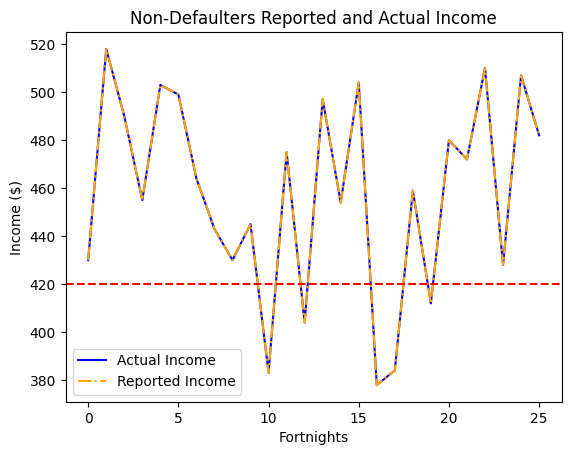

In [43]:
# Plot incomes over two years from the above dataframes. plot both 2018 and 2019
# on the same plot. Use the following code to make the plot.
plt.plot(non_defaulter_incomes['actual_income'], color='blue', label = 'Actual Income')
plt.plot(non_defaulter_incomes['reported_income'], color='orange', linestyle = '-.', label = 'Reported Income')
#add a line to show a point for 400
plt.axhline(y=420, color='r', linestyle='--')
plt.title('Non-Defaulters Reported and Actual Income')
plt.legend()
plt.xlabel('Fortnights')
plt.ylabel('Income ($)')

With this threshold set, we can determine payouts being determined by the model

The actual payout for the individual who did not default should be $139.00
The reported payout for the individual who did not default is $139.00


Text(0, 0.5, 'Payout ($)')

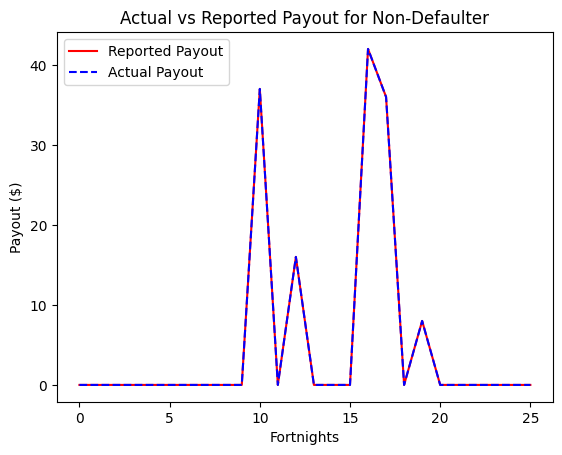

In [50]:
actual_income = non_defaulter_incomes['actual_income']
actual_payout = [420 - x if x < 420 else 0 for x in actual_income]
reported_income = non_defaulter_incomes['reported_income']
reported_payout = [420 - x if x < 420 else 0 for x in reported_income]
print(f'The actual payout for the individual who did not default should be ${sum(actual_payout):.2f}')
print(f'The reported payout for the individual who did not default is ${sum(reported_payout):.2f}')

plt.plot(reported_payout, label='Reported Payout', color = 'red')
plt.plot(actual_payout, label='Actual Payout', color = 'blue', linestyle = '--')
plt.title('Actual vs Reported Payout for Non-Defaulter')
plt.legend()
plt.xlabel('Fortnights')
plt.ylabel('Payout ($)')


According to the robodebt algorithm, the ATO reported income is converted into a fortnightly average income and is compared against the centerlink reported fortnightly income. The averaged ATO income is used to calculate the individuals fortnightly welfare payments and if there is a discrepancy between the amount they were actually paid out, they are labelled a defaulter and issued a debt notice.

In [32]:
mean_annual_reported_income = np.mean(actual_income)
if mean_annual_reported_income < 420:
    ato_payout = (420 - mean_annual_reported_income)*26
else:
    ato_payout = 0
print(f"ATO Payout: ${ato_payout:.2f}")
total_actual_payout = sum(reported_payout)
if total_actual_payout > ato_payout:
    print(f'Actual payout is more than what the ato_payout would have been, so the individual is a defaulter and owes ${total_actual_payout - ato_payout:.2f} ')

ATO Payout: $0.00
Actual payout is more than what the ato_payout would have been, so the individual is a defaulter and owes $139.00 


# Here, even though the individual was reporting income truthfully, they were labelled as a defaulter. This problem arises only when the ATO reported income was averaged which does not produce a realistic description of how the individual was earning over the year. This also illustrates Jensesn's inequality as referenced in the original article.

# We can now do the analysis of a defaulter as well.

In [36]:
defaulter_incomes = pd.read_csv('defaulter_incomes.csv')
defaulter_incomes 

,fortnights,actual_income,reported_income
0,1,504,380
1,2,534,452
2,3,432,331
3,4,376,246
4,5,400,286
5,6,505,382
6,7,415,339
7,8,433,288
8,9,410,298
9,10,533,389


This individual is not honestly reporting their fortnightly income in an effort to recieve higher welfare payments. 

Text(0, 0.5, 'Income ($)')

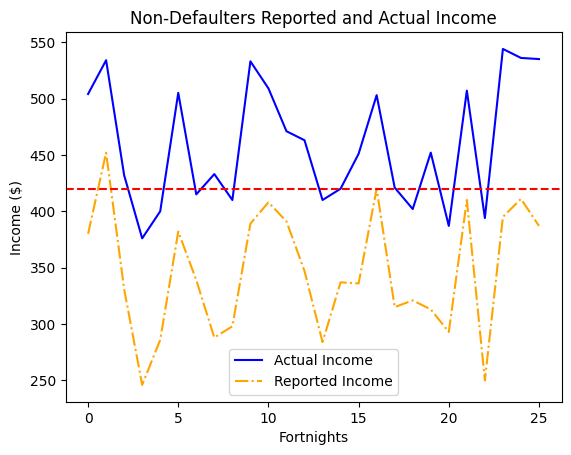

In [53]:
# Plot incomes over two years from the above dataframes. plot both 2018 and 2019
# on the same plot. Use the following code to make the plot.
plt.plot(defaulter_incomes['actual_income'], color='blue', label = 'Actual Income')
plt.plot(defaulter_incomes['reported_income'], color='orange', linestyle = '-.', label = 'Reported Income')
#add a line to show a point for 400
plt.axhline(y=420, color='r', linestyle='--')
plt.title('Non-Defaulters Reported and Actual Income')
plt.legend()
plt.xlabel('Fortnights')
plt.ylabel('Income ($)')

Once again, we can determine the payouts of the individual

The actual payout for the individual who did not default should be $166.00
The reported payout for the individual who did not default is $1943.00


Text(0, 0.5, 'Payout ($)')

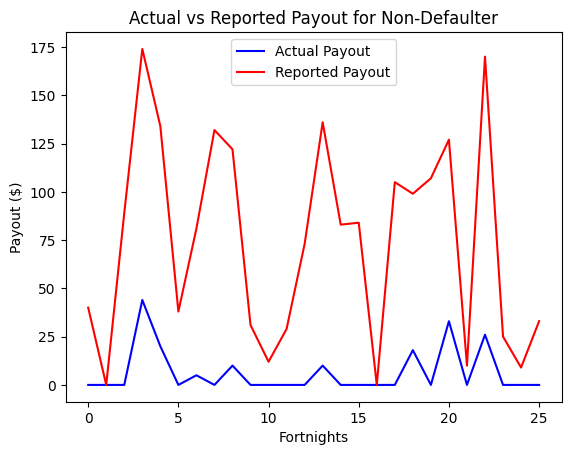

In [54]:
actual_income = defaulter_incomes['actual_income']
actual_payout = [420 - x if x < 420 else 0 for x in actual_income]
reported_income = defaulter_incomes['reported_income']
reported_payout = [420 - x if x < 420 else 0 for x in reported_income]
print(f'The actual payout for the individual who did not default should be ${sum(actual_payout):.2f}')
print(f'The reported payout for the individual who did not default is ${sum(reported_payout):.2f}')

plt.plot(actual_payout, label='Actual Payout', color = 'blue')
plt.plot(reported_payout, label='Reported Payout', color = 'red')
plt.title('Actual vs Reported Payout for Non-Defaulter')
plt.legend()
plt.xlabel('Fortnights')
plt.ylabel('Payout ($)')


Now we can determine the calculation done by the robodebt algorithm with the ATO income

In [55]:
mean_annual_reported_income = np.mean(actual_income)
if mean_annual_reported_income < 420:
    ato_payout = (420 - mean_annual_reported_income)*26
else:
    ato_payout = 0
print(f"ATO Payout: ${ato_payout:.2f}")
total_actual_payout = sum(reported_payout)
if total_actual_payout > ato_payout:
    print(f'Actual payout is more than what the ato_payout would have been, so the individual is a defaulter and owes ${total_actual_payout - ato_payout:.2f} ')

ATO Payout: $0.00
Actual payout is more than what the ato_payout would have been, so the individual is a defaulter and owes $1943.00 


# In this case, the robodebt algorithm correctly identified a defaulter since there were discrepancies between actual and reported income